# 机器学习基础

## 机器学习理论基础

**定理1**：万能逼近定理（Universal Approximation Theorem）
[Cybenko, 1989; Hornik et al., 1989]：
令$\phi(\cdot)$是一个非常数、有界、单调递增的连续函数，$\mathcal{J}_D$是一个$D$维的单位超立方体$[0,1]^D$，$C(\mathcal{J}_D)$是定义在$\mathcal{J}_D$上的连续函数集合。

对于任何一个函数$f \in C(\mathcal{J}_D)$，存在一个整数$M$，和一组实数$v_m, b_m \in \mathbb{R}$以及实数向量$\boldsymbol{w}_m \in \mathbb{R}^D$（$m = 1,\cdots,M$），以至于我们可以定义函数：
$$
F(\boldsymbol{x}) = \sum_{m=1}^{M} v_m \phi(\boldsymbol{w}_m^\top \boldsymbol{x} + b_m). \tag{1.1}
$$
作为函数$f$的近似实现，即：
$$
|F(\boldsymbol{x}) - f(\boldsymbol{x})| < \epsilon, \ \forall \boldsymbol{x} \in \mathcal{J}_D. \tag{1.2}
$$
其中$\epsilon > 0$是一个很小的正数。

万能逼近定理在实数空间$\mathbb{R}^D$中的有界闭集上依然成立。

根据万能逼近定理， 对于具有线性输出层和至少一个使用“挤压”性质的激活函数的隐藏层组成的前馈神经网络， 只要其隐藏层神经元的数量足够， 它可以以任意的精度来近似任何一个定义在实数空间 $\mathbb{R}^D$ 中的有界闭集函数[Funahashi et al., 1993; Hornik et al., 1989]。 所谓“挤压”性质的函数是指像 $Sigmoid$ 函数的有界函数， 但神经网络的万能逼近性质也被证明对于其他类型的激活函数，比如 $ReLU$，也都是适用的。


万能逼近定理只是说明了神经网络的计算能力可以去近似一个给定的连续函数，但并没有给出如何找到这样一个网络，以及是否是最优的。此外，当应用到机器学习时，真实的映射函数并不知道，一般是通过经验风险最小化和正则化来进行参数学习。因为神经网络的强大能力，反而容易在训练集上过拟合。

**定理2**：（ReLU 神经网络万能逼近的 1 维情形）：对于任意连续函数$ f \in C([0,1]) $和任意$ \epsilon > 0 $，存在一个两层ReLU网络$ N_\theta(x) $，使得：
$$
\| f - N_\theta \|_\infty < \epsilon \tag{1.3}
$$

**证明**：

（1）利用一致连续性构造分段线性插值函数 $ p_n(x) $

由于 $ f $ 在紧集 $ [0,1] $ 上连续，故 $ f $ 是一致连续的：

对任意 $ \epsilon > 0 $，存在 $ \delta > 0 $，使得对任意 $ x_1, x_2 \in [0,1] $，只要 $ |x_1 - x_2| < \delta $，就有 $ |f(x_1) - f(x_2)| < \epsilon $。


取均匀网格 $ 0 = \xi_0 < \xi_1 < \cdots < \xi_n = 1 $，其中网格间距 $ h = \xi_{i+1} - \xi_i = \frac{1}{n} $。
取$ n $ 足够大，使得 $ h < \delta $（由 $ \delta $ 的存在性，这样的 $ n $ 必然存在）。


定义分段线性插值函数 $ p_n(x) $：
在每个区间 $ [\xi_i, \xi_{i+1}] $ 上，$ p_n(x) $ 是连接 $ (\xi_i, f(\xi_i)) $和 $ (\xi_{i+1}, f(\xi_{i+1})) $ 的直线，即：
$$
p_n(x) = f(\xi_i) \cdot \frac{\xi_{i+1} - x}{h} + f(\xi_{i+1}) \cdot \frac{x - \xi_i}{h}, \quad x \in [\xi_i, \xi_{i+1}]\tag{1.4}
$$


由一致连续性，对任意 $ x \in [\xi_i, \xi_{i+1}] $，有 $ |x - \xi_i| < h < \delta $ 且 $ |x - \xi_{i+1}| < h < \delta $，因此：
$$
|f(x) - p_n(x)| \leq |f(x) - f(\xi_i)| \cdot \frac{\xi_{i+1} - x}{h} + |f(x) - f(\xi_{i+1})| \cdot \frac{x - \xi_i}{h} < \epsilon \cdot \left( \frac{\xi_{i+1} - x}{h} + \frac{x - \xi_i}{h} \right) = \epsilon \tag{1.5}
$$
即 $ \|f - p_n\|_\infty < \epsilon $。


（2）用ReLU表示帽函数 $ \phi_i(x) $

定义帽函数 $ \phi_i(x) $（以 $ \xi_i $ 为中心的分段线性函数）：
$$
\phi_i(x) = \begin{cases}
1 - \frac{|x - \xi_i|}{h}, & |x - \xi_i| \leq h, \\
0, & \text{其他}.
\end{cases}\tag{1.6}
$$


ReLU函数定义为 $ \sigma(z) = \max\{0, z\} $，其核心是“保留非负部分”。

对 $ 1 \leq i \leq n-1 $，展开帽函数的表达式：
- 当 $ x \in [\xi_{i-1}, \xi_i] $ 时，$ |x - \xi_i| = \xi_i - x $，故 $ \phi_i(x) = 1 - \frac{\xi_i - x}{h} = \frac{x - \xi_{i-1}}{h} $；
- 当 $ x \in [\xi_i, \xi_{i+1}] $ 时，$ |x - \xi_i| = x - \xi_i $，故 $ \phi_i(x) = 1 - \frac{x - \xi_i}{h} = \frac{\xi_{i+1} - x}{h} $；
- 当 $ x \notin [\xi_{i-1}, \xi_{i+1}] $ 时，$ \phi_i(x) = 0 $。


而ReLU的线性组合可以表示上述分段线性关系：
$$
\phi_i(x) = \frac{1}{h} \left[ \sigma(x - \xi_{i-1}) - 2\sigma(x - \xi_i) + \sigma(x - \xi_{i+1}) \right]. \tag{1.7}
$$



对于边界的帽函数 $ \phi_0(x) $ 和 $ \phi_n(x) $，可以类似表示：
- $ \phi_0(x) = \frac{1}{h} \left[ \sigma(\xi_1 - x) \right] = \frac{1}{h} \left[ \sigma(-(x - \xi_1)) \right] $；
- $ \phi_n(x) = \frac{1}{h} \left[ \sigma(x - \xi_{n-1}) \right] $。


（3）将插值函数 $ p_n(x) $ 表示为ReLU网络

由于（1）中的插值函数 $ p_n(x) $ 是帽函数的线性组合：
$$
p_n(x) = \sum_{i=0}^n f(\xi_i) \cdot \phi_i(x).\tag{1.8}
$$


将（2）中的帽函数 $ \phi_i(x) $ 的ReLU表示代入上式，得：
$$
p_n(x) = \sum_{i=0}^n f(\xi_i) \cdot \left( \frac{1}{h} \left[ \sigma(x - \xi_{i-1}) - 2\sigma(x - \xi_i) + \sigma(x - \xi_{i+1}) \right] \right).\tag{1.9}
$$


这是一个两层ReLU神经网络：
- 第一层（隐藏层）：由ReLU单元 $ \sigma(x - \xi_j) $ 组成（$ j = 0, 1, \dots, n+1 $）；
- 第二层（输出层）：对隐藏层的输出做线性组合（系数由 $ f(\xi_i) $ 和 $ h $ 决定）。


记这个ReLU网络为 $ N_\theta(x) = p_n(x) $，则由（1）中的结论，有：
$$
\|f - N_\theta\|_\infty = \|f - p_n\|_\infty < \epsilon.\tag{1.10}
$$

## 优化算法
#### 算法 BGD：批量梯度下降(Batch Gradient Descent)
1. 输入：初始参数 $x^0$、学习率 $\eta$（$\eta > 0$）、最大迭代次数 $K$、损失函数 $f(x)$（含 $N$ 个样本）。
2. 置迭代计数器 $k = 0$。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算全量样本的梯度（批量梯度）：$g^k = \nabla f(x^k) = \frac{1}{N} \sum_{i=1}^N \nabla f_i(x^k)$（$f_i$ 为第 $i$ 个样本的损失）。
5.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数：$x^{k+1} = x^k - \eta \cdot g^k$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon$（$\varepsilon$ 为极小阈值），则终止迭代。
7.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
8. **end while**
9. 输出：最终参数 $x^K$。

#### 算法 SGD：随机梯度下降(Stochastic Gradient Descent)
1. 输入：初始参数 $x^0$、学习率 $\eta$（$\eta > 0$）、最大迭代次数 $K$、损失函数 $f(x)$（含 $N$ 个样本）。
2. 置迭代计数器 $k = 0$。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;随机选取一个样本 $i \in \{1, 2, \cdots, N\}$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;计算单个样本的梯度（随机梯度）：$g^k = \nabla f_i(x^k)$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数：$x^{k+1} = x^k - \eta \cdot g^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若连续多轮梯度的均值 $\|\bar{g}^k\| < \varepsilon$，则终止迭代。
8.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
9. **end while**
10. 输出：最终参数 $x^K$。

#### 算法 MBGD：小批量梯度下降(Mini-Batch Gradient Descent)
1. 输入：初始参数 $x^0$、学习率 $\eta$（$\eta > 0$）、最大迭代次数 $K$、批量大小 $b$（$1 < b < N$）、损失函数 $f(x)$（含 $N$ 个样本）。
2. 置迭代计数器 $k = 0$，将样本集划分为若干个大小为 $b$ 的小批量（最后一批可不足 $b$ 个）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;随机选取一个小批量 $\mathcal{B}_k \subseteq \{1, 2, \cdots, N\}$（$\vert \mathcal{B}_k \vert = b$）。
5.  &nbsp;&nbsp;&nbsp;&nbsp;计算小批量梯度：$g^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(x^k)$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数：$x^{k+1} = x^k - \eta \cdot g^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon$（$\varepsilon$ 为极小阈值），则终止迭代。
8.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
9. **end while**
10. 输出：最终参数 $x^K$。

### 动量方法（Momentum）
动量方法模拟物理中的 “惯性”，通过累积历史梯度的加权平均来更新参数，减少迭代波动、加速收敛（尤其适用于非凸优化或梯度震荡场景）。
#### 算法 Momentum：标准动量梯度下降(Standard Momentum)
1. 输入：初始参数 $x^0$、学习率 $\eta$（$\eta > 0$）、动量系数 $\gamma$（$0 \leq \gamma < 1$，常用 $\gamma=0.9$）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon$。
2. 置迭代计数器 $k = 0$，初始化动量项 $v^0 = 0$（与参数 $x$ 同维度的零向量）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算当前梯度（此处以MBGD为例）：
    随机选取小批量 $\mathcal{B}_k$，$g^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(x^k)$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;更新动量项（累积历史梯度惯性）：$v^k = \gamma \cdot v^{k-1} + \eta \cdot g^k$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数（沿动量方向移动）：$x^{k+1} = x^k - v^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon$ 或 $\|x^{k+1} - x^k\| < \varepsilon$，则终止迭代。
8.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
9. **end while**
10. 输出：最终参数 $x^K$。

#### 算法 NAG：Nesterov加速动量梯度下降(Nesterov Accelerated Gradient)
1. 输入：初始参数 $x^0$、学习率 $\eta$（$\eta > 0$）、动量系数 $\gamma$（$0 \leq \gamma < 1$，常用 $\gamma=0.9$）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon$。
2. 置迭代计数器 $k = 0$，初始化动量项 $v^0 = 0$（与参数 $x$ 同维度的零向量）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算前瞻位置（先沿历史动量移动）：$\tilde{x}^k = x^k - \gamma \cdot v^{k-1}$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;在前瞻位置计算梯度（此处以MBGD为例）：
    随机选取小批量 $\mathcal{B}_k$，$\tilde{g}^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(\tilde{x}^k)$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;更新动量项：$v^k = \gamma \cdot v^{k-1} + \eta \cdot \tilde{g}^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数：$x^{k+1} = x^k - v^k$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|\tilde{g}^k\| < \varepsilon$ 或 $\|x^{k+1} - x^k\| < \varepsilon$，则终止迭代。
9.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
10. **end while**
11. 输出：最终参数 $x^K$。

### AdaGrad（自适应梯度下降）
AdaGrad 是一种自适应学习率优化算法，核心思想是为每个参数维护一个独立的学习率：频繁更新的参数（梯度绝对值大）会降低学习率，稀疏更新的参数（梯度绝对值小）会提高学习率，适用于稀疏数据或需要自适应调整步长的场景。
#### 算法 AdaGrad：自适应梯度下降
1. 输入：初始参数 $x^0$、全局学习率 $\eta$（$\eta > 0$，常用 $\eta=0.01$）、平滑参数 $\varepsilon$（$\varepsilon > 0$，常用 $\varepsilon=10^{-8}$，避免分母为0）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon_{\text{conv}}$。
2. 置迭代计数器 $k = 0$，初始化梯度平方累积项 $G^0 = 0$（与参数 $x$ 同维度的零向量，逐元素累积梯度平方）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算当前梯度（此处以 SGD 为例，适配稀疏数据场景）：
    随机选取单个样本 $i \in \{1,2,\cdots,N\}$，$g^k = \nabla f_i(x^k)$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;累积梯度平方（逐元素更新）：$G^k = G^{k-1} + g^k \odot g^k$（$\odot$ 为按元素乘积）。
6.  &nbsp;&nbsp;&nbsp;&nbsp;计算自适应学习率（逐参数调整）：$\eta^k = \frac{\eta}{\sqrt{G^k + \varepsilon}}$（分母为梯度平方累积的开方，逐元素计算）。
7.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数（逐元素按自适应学习率移动）：$x^{k+1} = x^k - \eta^k \odot g^k$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon_{\text{conv}}$ 或 $\|x^{k+1} - x^k\| < \varepsilon_{\text{conv}}$，则终止迭代。
9.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
10. **end while**
11. 输出：最终参数 $x^K$。

### 算法：RMSProp（Root Mean Square Propagation）
RMSProp 是 AdaGrad 的改进版自适应学习率优化算法，核心解决了 AdaGrad 学习率持续衰减的问题 —— 通过引入指数移动平均（EMA） 替代梯度平方的累积，让梯度平方项更关注近期梯度信息，避免学习率后期趋近于 0 导致迭代停滞，适用于非凸优化、深度神经网络训练等场景。

#### 算法 RMSProp：Root Mean Square Propagation
1. 输入：初始参数 $x^0$、全局学习率 $\eta$（$\eta > 0$，常用 $\eta=0.001$）、衰减系数 $\rho$（$0 \leq \rho < 1$，常用 $\rho=0.9$，控制历史梯度的遗忘程度）、平滑参数 $\varepsilon$（$\varepsilon > 0$，常用 $\varepsilon=10^{-8}$，避免分母为0）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon_{\text{conv}}$。
2. 置迭代计数器 $k = 0$，初始化梯度平方的指数移动平均项 $E[g^2]^0 = 0$（与参数 $x$ 同维度的零向量，逐元素维护）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算当前梯度（此处以 MBGD 为例，适配深度训练场景）：
    随机选取小批量 $\mathcal{B}_k$（大小为 $b$），$g^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(x^k)$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;指数移动平均更新梯度平方项（重点关注近期梯度，遗忘远期）：
    $E[g^2]^k = \rho \cdot E[g^2]^{k-1} + (1 - \rho) \cdot (g^k \odot g^k)$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;计算自适应学习率（逐参数调整，避免持续衰减）：
    $\eta^k = \frac{\eta}{\sqrt{E[g^2]^k + \varepsilon}}$（分母为梯度平方移动平均的开方，逐元素计算）。
7.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数（沿梯度反方向，按自适应学习率移动）：
    $x^{k+1} = x^k - \eta^k \odot g^k$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon_{\text{conv}}$ 或 $\|x^{k+1} - x^k\| < \varepsilon_{\text{conv}}$，则终止迭代。
9.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
10. **end while**
11. 输出：最终参数 $x^K$。

### 算法：AdaDelta（自适应学习率优化算法）
AdaDelta 是 AdaGrad 和 RMSProp 的进阶改进版，核心特点是完全无需手动设置全局学习率—— 通过引入 “参数更新量的指数移动平均” 替代固定学习率，同时用梯度平方的移动平均调整步长，既解决了 AdaGrad 学习率持续衰减的问题，又避免了 RMSProp 对全局学习率的依赖，收敛更稳定、适配性更强。

#### 算法 AdaDelta：自适应梯度下降（无固定学习率）
1. 输入：初始参数 $x^0$、衰减系数 $\rho$（$0 \leq \rho < 1$，常用 $\rho=0.95$，平衡历史与当前信息）、平滑参数 $\varepsilon$（$\varepsilon > 0$，常用 $\varepsilon=10^{-6}$，避免分母为0）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon_{\text{conv}}$。
2. 置迭代计数器 $k = 0$，初始化两个指数移动平均项：
   - 梯度平方的移动平均 $E[g^2]^0 = 0$（与 $x$ 同维度零向量，逐元素维护）；
   - 参数更新量的移动平均 $E[\Delta x^2]^0 = 0$（与 $x$ 同维度零向量，逐元素维护）。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算当前梯度（此处以 MBGD 为例）：
    随机选取小批量 $\mathcal{B}_k$（大小为 $b$），$g^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(x^k)$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;更新梯度平方的移动平均（关注近期梯度信息）：
    $E[g^2]^k = \rho \cdot E[g^2]^{k-1} + (1 - \rho) \cdot (g^k \odot g^k)$（$\odot$ 为按元素乘积）。
6.  &nbsp;&nbsp;&nbsp;&nbsp;计算自适应步长（无固定学习率，用更新量的移动平均替代）：
    $\Delta x^k = -\sqrt{\frac{E[\Delta x^2]^{k-1} + \varepsilon}{E[g^2]^k + \varepsilon}} \odot g^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数：$x^{k+1} = x^k + \Delta x^k$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数更新量的移动平均（反馈近期步长信息）：
    $E[\Delta x^2]^k = \rho \cdot E[\Delta x^2]^{k-1} + (1 - \rho) \cdot (\Delta x^k \odot \Delta x^k)$。
9.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|g^k\| < \varepsilon_{\text{conv}}$ 或 $\|\Delta x^k\| < \varepsilon_{\text{conv}}$，则终止迭代。
10. &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
11. **end while**
12. 输出：最终参数 $x^K$。

### 算法：Adam（Adaptive Moment Estimation）
Adam 是融合了 Momentum（动量） 和 RMSProp（自适应学习率） 的经典自适应优化算法，核心是同时维护梯度的一阶矩（均值，模拟动量）和二阶矩（未中心化方差，模拟自适应步长），并通过偏差修正解决迭代初期矩估计不稳定的问题，兼具收敛速度快、稳定性强的特点，是深度学习中最常用的优化算法之一。

#### 算法 Adam：自适应动量估计优化
1. 输入：初始参数 $x^0$、全局学习率 $\eta$（$\eta > 0$，常用 $\eta=0.001$）、一阶矩衰减系数 $\beta_1$（$0 \leq \beta_1 < 1$，常用 $\beta_1=0.9$，控制动量平滑程度）、二阶矩衰减系数 $\beta_2$（$0 \leq \beta_2 < 1$，常用 $\beta_2=0.999$，控制自适应步长平滑程度）、平滑参数 $\varepsilon$（$\varepsilon > 0$，常用 $\varepsilon=10^{-8}$，避免分母为0）、最大迭代次数 $K$、损失函数 $f(x)$、收敛阈值 $\varepsilon_{\text{conv}}$。
2. 置迭代计数器 $k = 0$，初始化两个矩估计项（与参数 $x$ 同维度零向量）：
   - 一阶矩（梯度均值，模拟动量）：$m^0 = 0$；
   - 二阶矩（梯度未中心化方差）：$v^0 = 0$。
3. **while** $k < K$ 且未达到收敛条件 **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;计算当前梯度（此处以 MBGD 为例，适配深度学习场景）：
    随机选取小批量 $\mathcal{B}_k$（大小为 $b$），$g^k = \frac{1}{b} \sum_{i \in \mathcal{B}_k} \nabla f_i(x^k)$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;更新一阶矩（梯度的指数移动平均，累积动量）：
    $m^k = \beta_1 \cdot m^{k-1} + (1 - \beta_1) \cdot g^k$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;更新二阶矩（梯度平方的指数移动平均，自适应步长）：
    $v^k = \beta_2 \cdot v^{k-1} + (1 - \beta_2) \cdot (g^k \odot g^k)$（$\odot$ 为按元素乘积）。
7.  &nbsp;&nbsp;&nbsp;&nbsp;偏差修正（解决迭代初期矩估计偏小的问题）：  
    $\hat{m}^k = \frac{m^k}{1 - \beta_1^k}$（$k$ 为当前迭代次数，初始迭代 $k=1$ 时修正幅度最大）；  
    $\hat{v}^k = \frac{v^k}{1 - \beta_2^k}$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;更新参数（融合动量与自适应步长）：
    $x^{k+1} = x^k - \eta \cdot \frac{\hat{m}^k}{\sqrt{\hat{v}^k} + \varepsilon}$。
9.  &nbsp;&nbsp;&nbsp;&nbsp;判断收敛：若 $\|\hat{m}^k\| < \varepsilon_{\text{conv}}$ 或 $\|x^{k+1} - x^k\| < \varepsilon_{\text{conv}}$，则终止迭代。
10. &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
11. **end while**
12. 输出：最终参数 $x^K$。

### 算法：BFGS（Broyden-Fletcher-Goldfarb-Shanno）
BFGS 是经典的拟牛顿法，核心思想是通过迭代过程中积累的梯度和参数更新信息，构造目标函数海森矩阵（Hessian）的近似逆矩阵，避免直接计算海森矩阵（高维场景下计算复杂度极高），同时保持拟牛顿条件（满足梯度信息的局部近似），收敛速度远快于普通梯度下降，适用于中低维无约束优化问题。

#### 算法 BFGS：拟牛顿优化算法
1. 输入：初始参数 $x^0$、初始海森矩阵逆近似 $H^0$（常用单位矩阵 $I$，与参数 $x$ 同维度）、收敛阈值 $\varepsilon$（常用 $\varepsilon=10^{-6}$）、最大迭代次数 $K$、损失函数 $f(x)$、线搜索参数（$\alpha \in (0,0.5)$，$\beta \in (0,1)$，常用 $\alpha=0.0001$，$\beta=0.9$）。
2. 置迭代计数器 $k = 0$，计算初始梯度 $g^0 = \nabla f(x^0)$。
3. **while** $k < K$ 且 $\|g^k\| > \varepsilon$ **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;步骤1：计算搜索方向 ：
    基于近似海森逆矩阵和当前梯度，确定下降方向：$d^k = -H^k \cdot g^k$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;步骤2：线搜索（确定步长 $\lambda^k$） ：
    采用 Wolfe 条件（或 Armijo 条件）寻找满足要求的步长 $\lambda^k > 0$，保证函数值充分下降：  
    a. 初始化 $\lambda = 1.0$；  
    b. 若 $f(x^k + \lambda \cdot d^k) > f(x^k) + \alpha \cdot \lambda \cdot (g^k \cdot d^k)$（不满足充分下降条件），则 $\lambda = \beta \cdot \lambda$，重复此步骤；  
    c. （Wolfe 曲率条件）若 $g(x^k + \lambda \cdot d^k) \cdot d^k \geq \beta \cdot (g^k \cdot d^k)$，停止搜索；否则调整 $\lambda$ 直至满足；  
    d. 令 $\lambda^k = \lambda$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;步骤3：更新参数与梯度 ：  
    a. 计算参数更新量：$s^k = x^{k+1} - x^k = \lambda^k \cdot d^k$；  
    b. 更新参数：$x^{k+1} = x^k + s^k$；  
    c. 计算新梯度：$g^{k+1} = \nabla f(x^{k+1})$；  
    d. 计算梯度更新量：$y^k = g^{k+1} - g^k$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;步骤4：更新海森逆矩阵近似（BFGS 校正公式）：  
    若 $y^k \cdot s^k \leq 0$（不满足曲率条件，避免数值不稳定），则跳过校正，保持 $H^{k+1} = H^k$；
    否则，按以下公式更新 $H^{k+1}$（满足拟牛顿条件 $H^{k+1} \cdot y^k = s^k$）：  
    a. 计算中间系数：$\rho^k = \frac{1}{y^k \cdot s^k}$（$·$ 为向量内积，保证分母非负）；  
    b. 构造校正矩阵：
       $$H^{k+1} = (I - \rho^k \cdot s^k \cdot y^T) \cdot H^k \cdot (I - \rho^k \cdot y^k \cdot s^T) + \rho^k \cdot s^k \cdot s^T$$
    （注：$s^T$、$y^T$ 为向量的转置，$I$ 为单位矩阵，矩阵乘法均为普通矩阵乘法）。
8.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
9. **end while**
10. 输出：最终参数 $x^K$。

### 算法：L-BFGS（Limited-memory Broyden-Fletcher-Goldfarb-Shanno）
L-BFGS 是 BFGS 拟牛顿法的内存高效版，核心思想是通过有限次迭代的梯度和参数更新信息，近似构造目标函数的海森矩阵（或其逆矩阵），避免 BFGS 存储完整海森矩阵的高内存开销，适用于大规模优化问题（如机器学习、深度学习中的无约束优化场景）。
#### 算法 L-BFGS：有限内存拟牛顿法
1. 输入：初始参数 $x^0$、内存窗口大小 $m$（$m \geq 1$，常用 $m=5\sim20$，控制存储的历史信息数量）、梯度阈值 $\varepsilon$（收敛判据，常用 $\varepsilon=10^{-6}$）、最大迭代次数 $K$、损失函数 $f(x)$、线搜索参数（$\alpha \in (0,0.5)$，$\beta \in (0,1)$，常用 $\alpha=0.0001$，$\beta=0.9$）。
2. 置迭代计数器 $k = 0$，计算初始梯度 $g^0 = \nabla f(x^0)$，初始化历史信息缓存（存储最近 $m$ 组 $\{s^i, y^i\}$，$s^i = x^{i+1} - x^i$，$y^i = g^{i+1} - g^i$）：$\text{cache} = \emptyset$。
3. **while** $k < K$ 且 $\|g^k\| > \varepsilon$ **do**
4.  &nbsp;&nbsp;&nbsp;&nbsp;步骤1：构造搜索方向 $d^k$（L-BFGS 双循环递推）：  
    a. 若 $k=0$（首次迭代），用负梯度方向初始化：$d^k = -g^k$；  
    b. 否则，从缓存中取出最近 $t = \min(m, k)$ 组历史信息 $\{(s^{k-t}, y^{k-t}), \cdots, (s^{k-1}, y^{k-1})\}$，执行以下双循环：  
       i. 前向循环（计算系数 $\alpha_i$）：  
          初始化 $q = g^k$；
          对 $i = k-1, k-2, \cdots, k-t$：
              $\rho_i = \frac{1}{y^i \cdot s^i}$；
              $\alpha_i = \rho_i \cdot (s^i \cdot q)$；
              $q = q - \alpha_i \cdot y^i$；  
       ii. 缩放 $q$（近似海森矩阵初始化）：  
           若 $k \geq 1$，取最近一组 $\{s^{k-1}, y^{k-1}\}$，令 $H_0 = \frac{s^{k-1} \cdot y^{k-1}}{y^{k-1} \cdot y^{k-1}} \cdot I$（$I$ 为单位矩阵），$r = H_0 \cdot q$；  
       iii. 后向循环（计算搜索方向）：  
           对 $i = k-t, k-t+1, \cdots, k-1$：
               $\beta_i = \rho_i \cdot (y^i \cdot r)$；
               $r = r + s^i \cdot (\alpha_i - \beta_i)$；  
           最终搜索方向：$d^k = -r$。
5.  &nbsp;&nbsp;&nbsp;&nbsp;步骤2：线搜索（确定步长 $\lambda^k$）：
    采用 Wolfe 条件（或 Armijo 条件）寻找满足要求的步长 $\lambda^k > 0$：  
    a. 初始化 $\lambda = 1.0$；  
    b. 若 $f(x^k + \lambda \cdot d^k) > f(x^k) + \alpha \cdot \lambda \cdot (g^k \cdot d^k)$（不满足充分下降条件），则 $\lambda = \beta \cdot \lambda$，重复此步骤；  
    c. 若 Wolfe 条件需曲率条件：$g(x^k + \lambda \cdot d^k) \cdot d^k \geq \beta \cdot (g^k \cdot d^k)$，不满足则调整 $\lambda$ 直至满足；  
    d. 令 $\lambda^k = \lambda$。
6.  &nbsp;&nbsp;&nbsp;&nbsp;步骤3：更新参数与梯度：
    $x^{k+1} = x^k + \lambda^k \cdot d^k$；
    $g^{k+1} = \nabla f(x^{k+1})$。
7.  &nbsp;&nbsp;&nbsp;&nbsp;步骤4：更新缓存（维护最近 $m$ 组历史信息）：  
    计算 $s^k = x^{k+1} - x^k$，$y^k = g^{k+1} - g^k$；
    若 $\text{len(cache)} < m$，则将 $\{s^k, y^k\}$ 加入 cache；
    否则，删除 cache 中最早的一组信息，再加入 $\{s^k, y^k\}$。
8.  &nbsp;&nbsp;&nbsp;&nbsp;$k \leftarrow k + 1$。
9. **end while**
10. 输出：最终参数 $x^K$。

### 算法对比
| 方法      | 是否使用海森矩阵？          | 内存开销   | 典型应用场景                  |
|-----------|-----------------------------|------------|-------------------------------|
| GD/SGD    | 否                          | $O(n)$     | 大规模、随机训练              |
| Adam      | 否                          | $O(n)$     | 深度学习、PINNs预热启动       |
| BFGS      | 是（近似）                  | $O(n^2)$   | 小型/中型问题                 |
| L-BFGS    | 是（近似、有限内存）        | $O(mn)$    | 神经网络、PINNs、PDE训练      |

## 反向传播
**定理3**：设神经网络第$l$层的仿射变换与激活分别为
$$z^{(l)} = W^{(l)}a^{(l-1)} + b^{(l)}, \quad a^{(l)} = \sigma(z^{(l)}).\tag{1.11}$$
记上游梯度（loss 对该层输出的导数）为
$$
\delta^{(l)} \triangleq \frac{\partial L}{\partial z^{(l)}}.\tag{1.12}
$$
则上游梯度沿网络反向传递满足链式递推
$$
\delta^{(l-1)} = \left(W^{(l)}\right)^\top \delta^{(l)} \odot \sigma'(z^{(l-1)}).\tag{1.13}
$$
其中 $\odot$ 表示 Hadamard 乘积。

因此，任何一层参数梯度可简洁表示为
$$
\frac{\partial L}{\partial W^{(l)}} = \delta^{(l)} \left(a^{(l-1)}\right)^\top, \quad \frac{\partial L}{\partial b^{(l)}} = \delta^{(l)}.\tag{1.14}
$$
上游梯度 $\delta^{(l)}$ 成为连接全局损失与局部参数更新的唯一媒介，实现计算上的局部性、高效性与通用性。

注：反向传播的核心是链式法则的简单应用，推导过程并不复杂，因此这里不再展开详述，具体的推导示例可参考作业 3。

## 作业1：在简单二次函数上的梯度下降
考虑如下二维二次函数：
$$F(x) = \frac{1}{2}x^\mathrm{T}Ax + b^\mathrm{T}x,$$
其中 $A = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$，$b = \begin{pmatrix} -2 \\ -4 \end{pmatrix}$。


#### 任务：
(a) 通过求解 $\nabla F(x) = 0$，解析计算精确极小值点 $x^*$。

(b) 实现梯度下降（GD）算法：
$$x_{k+1} = x_k - \alpha \nabla F(x_k)$$
使用Python（或MATLAB）实现，初始点为 $x_0 = (0, 0)^\mathrm{T}$。尝试不同的步长 $\alpha$（过小、合适、过大）。

(c) 绘制不同 $\alpha$ 对应的 $F(x_k)$ 随迭代次数的变化曲线，并讨论收敛行为的差异。

(d)（可选）在 $(x_1, x_2)$ 平面上绘制 $F$ 的等值线与梯度下降的轨迹。

### 作业1解答
(a)对于二次函数 $F(x) = \frac{1}{2}x^\mathrm{T}Ax + b^\mathrm{T}x$，其梯度为：
$$\nabla F(x) = Ax + b$$
极小值点满足 $\nabla F(x^*) = 0$，即线性方程组：
$$Ax^* = -b$$

代入 $A = \begin{pmatrix} 3 & 1 \\ 1 & 2 \end{pmatrix}$ 和 $b = \begin{pmatrix} -2 \\ -4 \end{pmatrix}$，求解：
$$\begin{cases} 3x_1^* + x_2^* = 2 \\ x_1^* + 2x_2^* = 4 \end{cases}\Rightarrow \begin{cases} x_1^* = 0 \\ x_2^* = 2 \end{cases}$$


精确极小值点：$x^* = (0, 2)^\mathrm{T}$，对应的极小值 $F(x^*) = \frac{1}{2}(0,2)\begin{pmatrix}3&1\\1&2\end{pmatrix}\begin{pmatrix}0\\2\end{pmatrix} + (-2,-4)\begin{pmatrix}0\\2\end{pmatrix} = 4 - 8 = -4$。

In [1]:
# (b) 梯度下降算法实现
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # 忽略警告信息

# 定义问题参数
A = np.array([[3, 1], [1, 2]])
b = np.array([-2, -4])
x_star = np.array([0, 2])  # 精确极小值点
F_star = 0.5 * x_star.T @ A @ x_star + b.T @ x_star  # 精确极小值

def compute_F(x):
    """计算函数值F(x)"""
    return 0.5 * x.T @ A @ x + b.T @ x

def compute_gradient(x):
    """计算梯度∇F(x) = Ax + b"""
    return A @ x + b

def gradient_descent(alpha, max_iter=1000, tol=1e-8):
    """梯度下降算法实现"""
    x = np.array([0.0, 0.0])  # 初始点
    F_history = [compute_F(x)]  # 函数值历史
    x_history = [x.copy()]  # 迭代点历史
    
    for k in range(max_iter):
        grad = compute_gradient(x)
        # 终止条件：梯度的L2范数小于阈值
        if np.linalg.norm(grad) < tol:
            break
        # 迭代更新
        x = x - alpha * grad
        # 记录历史
        F_history.append(compute_F(x))
        x_history.append(x.copy())
    
    return np.array(x_history), np.array(F_history)

# 测试不同步长（过小、合适、过大）
alphas = [0.05, 0.2, 0.8]  # 步长：过小(0.05)、合适(0.2)、过大(0.8)
results = [gradient_descent(alpha) for alpha in alphas]

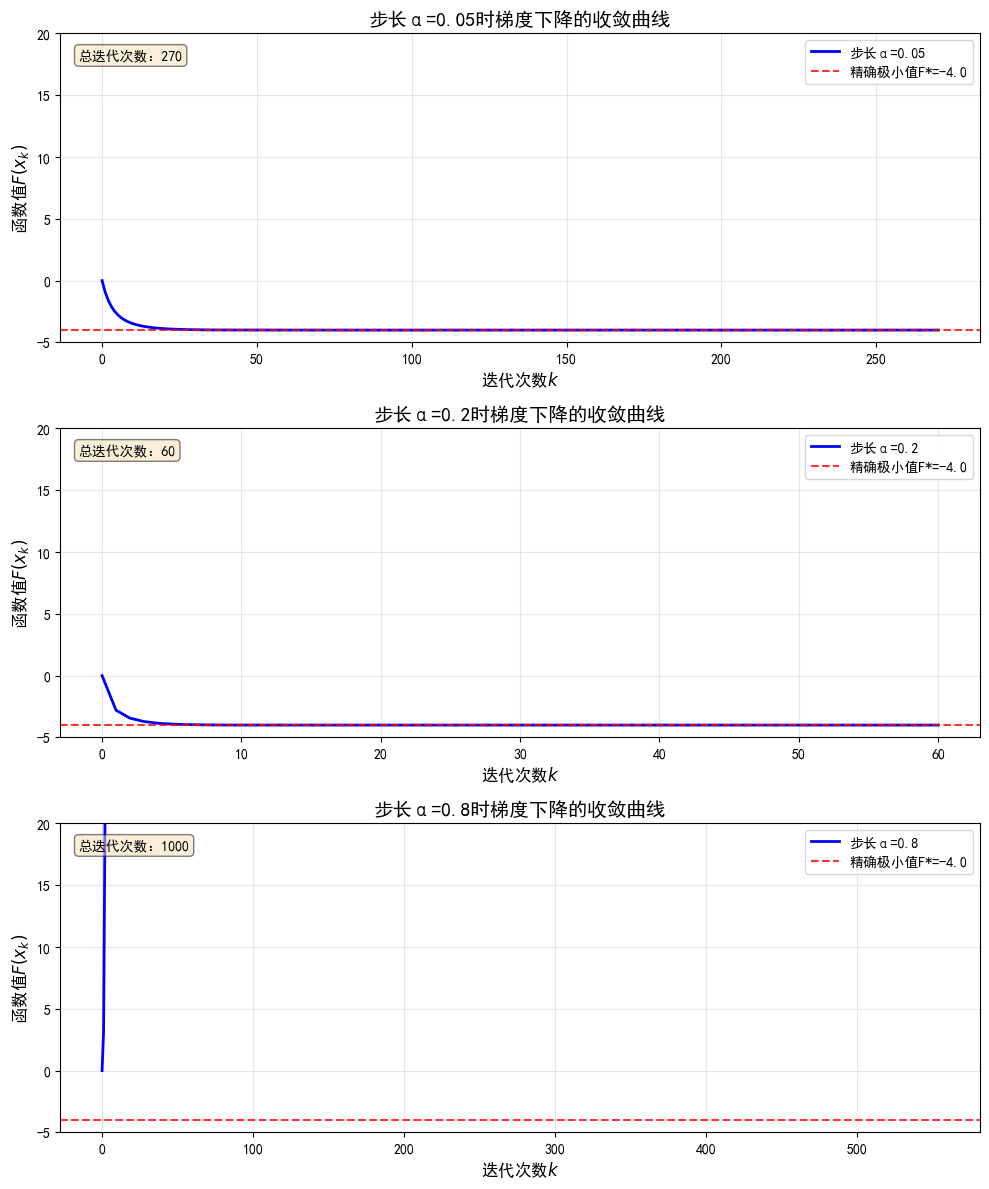

In [2]:
# (c) 绘制函数值收敛曲线
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 分别绘制三张图，每张图对应一个步长
fig, axes = plt.subplots(3, 1, figsize=(10, 12))  # 3行1列的子图布局

# 为每个步长绘制独立曲线
for i, (alpha, (x_hist, F_hist)) in enumerate(zip(alphas, results)):
    ax = axes[i]
    # 绘制当前步长的函数值曲线
    ax.plot(range(len(F_hist)), F_hist, label=f'步长α={alpha}', linewidth=2, color='blue')
    # 绘制精确极小值线
    ax.axhline(y=F_star, color='r', linestyle='--', label=f'精确极小值F*={F_star}', alpha=0.8)
    
    # 设置每个子图的标签、标题和格式
    ax.set_xlabel('迭代次数$k$', fontsize=12)
    ax.set_ylabel('函数值$F(x_k)$', fontsize=12)
    ax.set_title(f'步长α={alpha}时梯度下降的收敛曲线', fontsize=14)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(-5, 20)  # 统一y轴范围，便于对比
    
    # 显示迭代次数信息（可选，增强可读性）
    ax.text(0.02, 0.95, f'总迭代次数：{len(F_hist)-1}', transform=ax.transAxes, 
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 调整子图间距，避免重叠
plt.tight_layout()
plt.show()

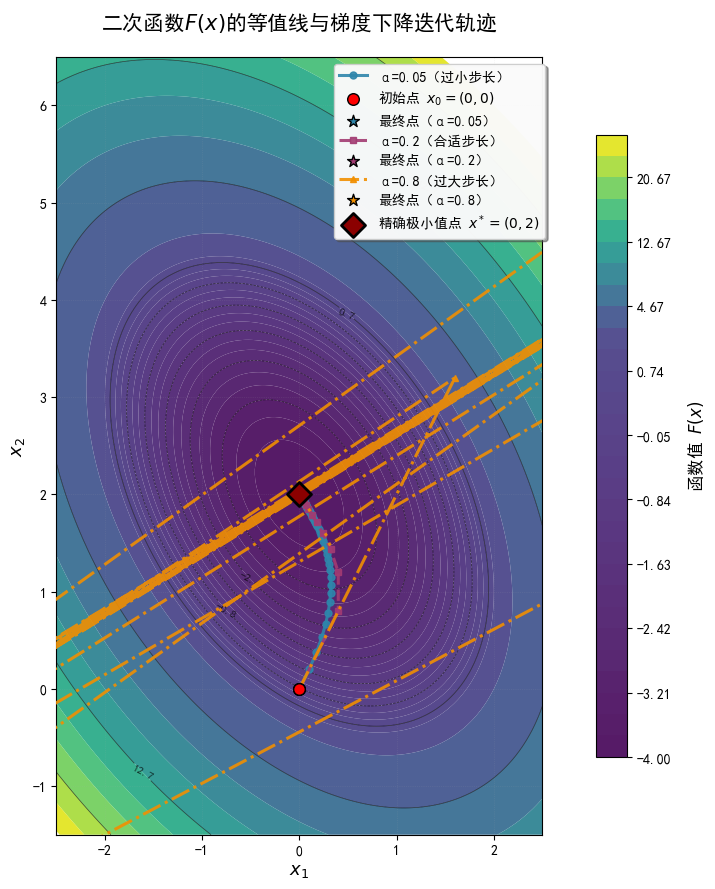

In [3]:
# (d) 绘制函数F(x)的等值线与迭代轨迹
# 1. 生成网格
x1 = np.linspace(-2.5, 2.5, 150)
x2 = np.linspace(-1.5, 6.5, 150)
X1, X2 = np.meshgrid(x1, x2)
F_grid = 0.5 * (A[0,0]*X1**2 + 2*A[0,1]*X1*X2 + A[1,1]*X2**2) + b[0]*X1 + b[1]*X2  # 计算网格上的函数值

# 2. 创建图形
fig, ax = plt.subplots(figsize=(11, 9))

# 3. 等值线分层策略
F_min = F_grid.min()  # 网格上的最小函数值（捕捉全局低值区域）
F_max = F_star + 30   # 限制最大值（避免高值区域过度拉伸颜色）
# 采用"低值密集+高值稀疏"的分箱（前20个聚焦极小值附近，后10个覆盖高值）
levels_low = np.linspace(F_min, F_star + 5, 20)  # 极小值附近密集分层
levels_high = np.linspace(F_star + 6, F_max, 10) # 高值区域稀疏分层
levels = np.concatenate([levels_low, levels_high]) # 合并分层

# 增强颜色映射对比度（使用高对比度colormap，增加透明度）
contour = ax.contourf(  # 先用contourf填充颜色（渐变核心）
    X1, X2, F_grid, 
    levels=levels, 
    cmap='viridis',  # 高对比度colormap
    alpha=0.9,       # 提高透明度，让颜色更突出
    antialiased=True # 抗锯齿，让渐变更平滑
)
# 叠加轮廓线（让分层更清晰）
contour_lines = ax.contour(
    X1, X2, F_grid, 
    levels=levels[::3],  # 每隔3层画一条轮廓线，避免杂乱
    colors='black',      # 黑色轮廓线，突出层次
    linewidths=0.5,
    alpha=0.7
)
# 标注轮廓线（只标注关键层，避免拥挤）
ax.clabel(contour_lines, inline=True, fontsize=8, fmt='%.1f', levels=levels[::6])

# 4. 绘制迭代轨迹（保持差异化样式）
styles = [
    {'color': '#2E86AB', 'marker': 'o', 'linestyle': '-', 'label': 'α=0.05（过小步长）'},
    {'color': '#A23B72', 'marker': 's', 'linestyle': '--', 'label': 'α=0.2（合适步长）'},
    {'color': '#F18F01', 'marker': '^', 'linestyle': '-.', 'label': 'α=0.8（过大步长）'}
]

for i, (alpha, (x_hist, F_hist), style) in enumerate(zip(alphas, results, styles)):
    ax.plot(
        x_hist[:, 0], x_hist[:, 1],
        color=style['color'],
        marker=style['marker'],
        markersize=5,
        linestyle=style['linestyle'],
        linewidth=2.2,
        alpha=0.9,
        label=style['label'],
        zorder=5  # 确保轨迹在填充色上方，但不遮挡关键标记
    )
    # 初始点
    ax.scatter(
        x_hist[0, 0], x_hist[0, 1],
        color='red',
        s=70,
        edgecolors='black',
        zorder=10,
        label='初始点 $x_0=(0,0)$' if i == 0 else ""
    )
    # 最终点
    ax.scatter(
        x_hist[-1, 0], x_hist[-1, 1],
        color=style['color'],
        s=80,
        marker='*',
        edgecolors='black',
        zorder=10,
        label=f'最终点（α={alpha}）'
    )

# 5. 标记精确极小值点
ax.scatter(
    x_star[0], x_star[1],
    color='darkred',
    s=150,
    marker='D',
    edgecolors='black',
    linewidth=2,
    zorder=15,  # 最上层，不被遮挡
    label=f'精确极小值点 $x^*=(0,2)$'
)

# 6. 等比例与坐标轴范围
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-1.5, 6.5)

# 7. 其他优化
ax.set_xlabel('$x_1$', fontsize=13)
ax.set_ylabel('$x_2$', fontsize=13)
ax.set_title(
    '二次函数$F(x)$的等值线与梯度下降迭代轨迹',
    fontsize=15,
    pad=20
)
ax.legend(
    loc='upper right',
    bbox_to_anchor=(1.02, 1),
    framealpha=0.95,
    shadow=True,
    ncol=1
)
ax.grid(True, alpha=0.2, linestyle=':', linewidth=0.5)  # 降低网格透明度，避免干扰渐变

# 优化颜色条
cbar = plt.colorbar(contour, ax=ax, shrink=0.8, extend='max')  # extend='max'处理超出范围的高值
cbar.set_label('函数值 $F(x)$', fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=10)  # 调整颜色条刻度大小

plt.tight_layout()
plt.show()

## 作业2：Adam与SGD在非凸损失函数上的对比
考虑如下一维非凸函数：
$$F(w) = \frac{1}{4}w^4 - \frac{1}{2}w^2 + 0.1w$$


#### 任务：
(a) 在区间 $w \in [-2, 2]$ 上绘制 $F(w)$ 的图像，并（通过可视化）识别局部极小值点与极大值点。

(b) 实现SGD（随机梯度下降）与Adam算法，以极小化 $F(w)$，并从不同初始点 $w_0$ 开始（例如 $w_0 = -1.5, 0, 1.5$）。

(c) 针对每个优化器和初始点，绘制 $w_k$ 与 $F(w_k)$ 随迭代次数的变化曲线。

(d) 对比以下内容：
- 对学习率的敏感性
- 逃离浅局部极小值的能力
- 收敛速度

(e) 用一小段文字总结：在哪些情况下，Adam相比普通SGD具有明显优势。

### 作业2的解答

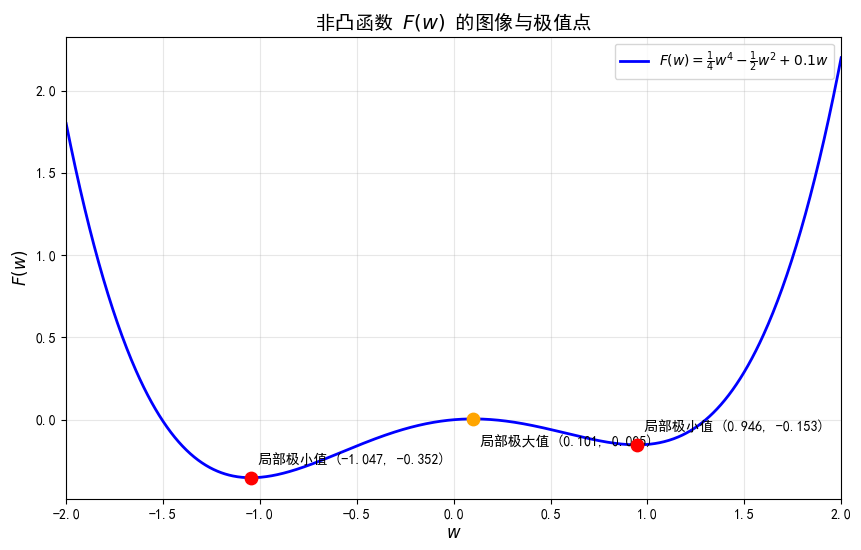

In [4]:
# (a) 绘制F(w)的函数图像与极值点识别
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# 定义目标函数及其梯度
def F(w):
    """目标非凸函数 F(w) = 1/4 w⁴ - 1/2 w² + 0.1w"""
    return 0.25 * w**4 - 0.5 * w**2 + 0.1 * w

def grad_F(w):
    """F(w)的梯度：F’(w) = w³ - w + 0.1"""
    return w**3 - w + 0.1

# 绘制函数图像
plt.figure(figsize=(10, 6))
w_range = np.linspace(-2, 2, 1000) # w的取值范围
F_vals = F(w_range) # 计算对应的F(w)值
plt.plot(w_range, F_vals, 'b-', linewidth=2, label='$F(w) = \\frac{1}{4}w^4 - \\frac{1}{2}w^2 + 0.1w$')

# 数值方法找极值点（梯度为0的点）
critical_points = fsolve(grad_F, [-1.2, -0.1, 1.1])  # 初始猜测三个关键点，使用fsolve求解
critical_points = np.sort(critical_points) # 排序以便后续处理
F_critical = F(critical_points) # 计算对应的函数值，此时已经求得极值的数值

# 标记极值点（通过二阶导数判断类型）
def hess_F(w):
    """二阶导数 F''(w) = 3w² - 1"""
    return 3 * w**2 - 1

for w, f in zip(critical_points, F_critical):
    hess = hess_F(w)
    if hess > 0:
        label = f'局部极小值 ({w:.3f}, {f:.3f})'
        plt.scatter(w, f, color='red', s=80, zorder=5)
        plt.annotate(label, (w, f), xytext=(5, 10), textcoords='offset points', fontsize=10)
    else:
        label = f'局部极大值 ({w:.3f}, {f:.3f})'
        plt.scatter(w, f, color='orange', s=80, zorder=5)
        plt.annotate(label, (w, f), xytext=(5, -20), textcoords='offset points', fontsize=10)

plt.xlabel('$w$', fontsize=12)
plt.ylabel('$F(w)$', fontsize=12)
plt.title('非凸函数 $F(w)$ 的图像与极值点', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.xlim(-2, 2)
plt.show()

In [5]:
# (b) SGD和Adam算法实现
def sgd(grad, w0, lr=0.01, max_iter=1000, tol=1e-6):
    """SGD算法（无动量，固定学习率）
    参数：
        grad: 梯度函数
        w0: 初始点
        lr: 学习率
        max_iter: 最大迭代次数
        tol: 收敛阈值（梯度绝对值小于tol则停止）
    返回：
        w_history: 迭代过程中的w值
        F_history: 迭代过程中的F(w)值
    """
    w = w0
    w_history = [w]
    F_history = [F(w)]
    for _ in range(max_iter):
        g = grad(w)
        if abs(g) < tol:
            break
        w = w - lr * g
        w_history.append(w)
        F_history.append(F(w))
    return np.array(w_history), np.array(F_history)

def adam(grad, w0, lr=0.01, beta1=0.9, beta2=0.999, eps=1e-8, max_iter=1000, tol=1e-6):
    """Adam算法
    参数：
        grad: 梯度函数
        w0: 初始点
        lr: 学习率
        beta1: 一阶矩衰减系数
        beta2: 二阶矩衰减系数
        eps: 数值稳定性参数
        max_iter: 最大迭代次数
        tol: 收敛阈值
    返回：
        w_history: 迭代过程中的w值
        F_history: 迭代过程中的F(w)值
    """
    w = w0
    m = 0  # 一阶矩估计（动量）
    v = 0  # 二阶矩估计（自适应学习率）
    w_history = [w]
    F_history = [F(w)]
    for t in range(1, max_iter+1):
        g = grad(w)
        if abs(g) < tol:
            break
        # 更新一阶矩和二阶矩
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g**2
        # 偏差修正
        m_hat = m / (1 - beta1**t)
        v_hat = v / (1 - beta2**t)
        # 参数更新
        w = w - lr * m_hat / (np.sqrt(v_hat) + eps)
        w_history.append(w)
        F_history.append(F(w))
    return np.array(w_history), np.array(F_history)

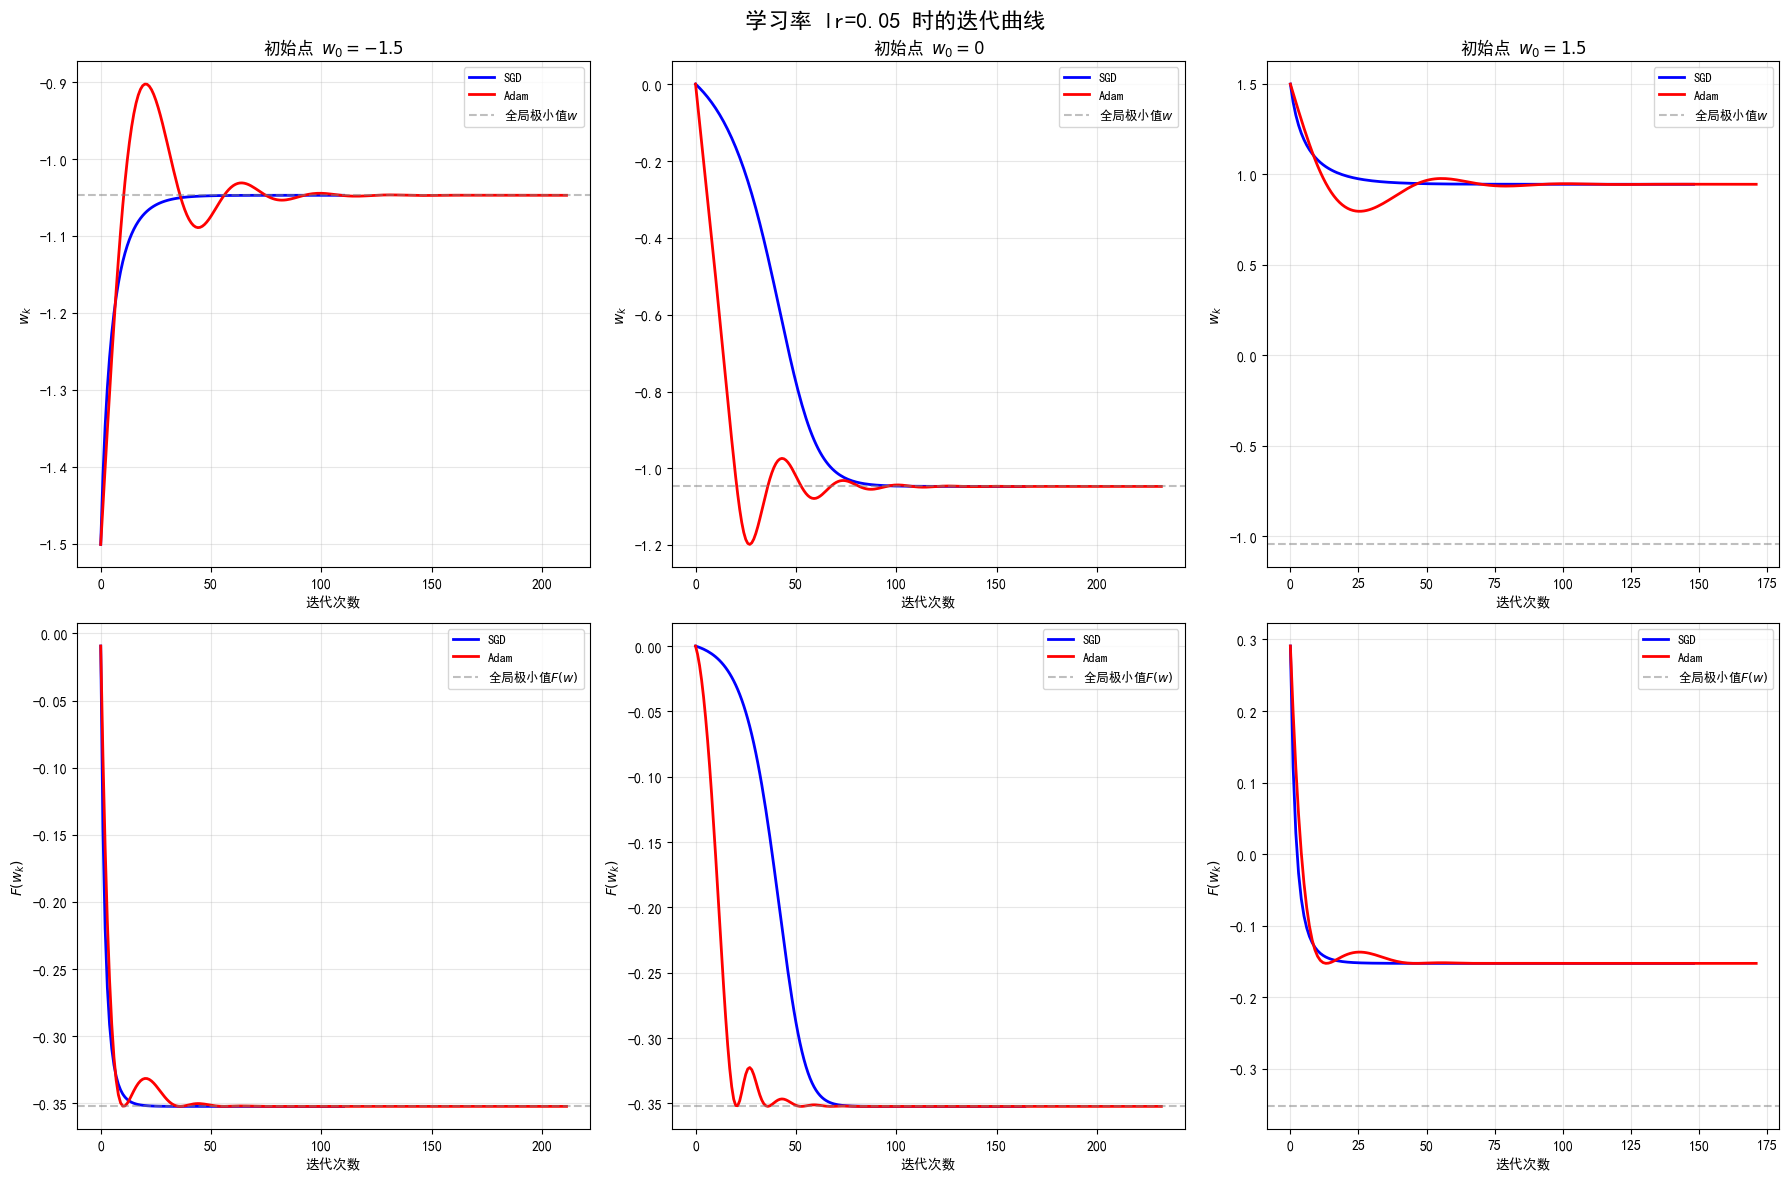

In [6]:
# (c) 绘制迭代曲线
# 实验设置
initial_points = [-1.5, 0, 1.5]  # 初始点
lr_list = [0.01, 0.05, 0.1]      # 学习率（用于敏感性分析）
max_iter = 2000                  # 最大迭代次数

# 为每个初始点和优化器绘制曲线（以lr=0.05为例，敏感性分析见(d)）
lr = 0.05
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle(f'学习率 lr={lr} 时的迭代曲线', fontsize=16)

for idx, w0 in enumerate(initial_points):
    # 运行SGD和Adam
    w_sgd, F_sgd = sgd(grad_F, w0, lr=lr, max_iter=max_iter)
    w_adam, F_adam = adam(grad_F, w0, lr=lr, max_iter=max_iter)
    
    # 绘制w_k随迭代次数变化（上排）
    ax1 = axes[0, idx]
    ax1.plot(range(len(w_sgd)), w_sgd, 'b-', label='SGD', linewidth=2)
    ax1.plot(range(len(w_adam)), w_adam, 'r-', label='Adam', linewidth=2)
    ax1.axhline(y=critical_points[0], color='gray', linestyle='--', alpha=0.5, label='全局极小值$w$')
    ax1.set_xlabel('迭代次数', fontsize=10)
    ax1.set_ylabel('$w_k$', fontsize=10)
    ax1.set_title(f'初始点 $w_0={w0}$', fontsize=12)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # 绘制F(w_k)随迭代次数变化（下排）
    ax2 = axes[1, idx]
    ax2.plot(range(len(F_sgd)), F_sgd, 'b-', label='SGD', linewidth=2)
    ax2.plot(range(len(F_adam)), F_adam, 'r-', label='Adam', linewidth=2)
    ax2.axhline(y=F(critical_points[0]), color='gray', linestyle='--', alpha=0.5, label='全局极小值$F(w)$')
    ax2.set_xlabel('迭代次数', fontsize=10)
    ax2.set_ylabel('$F(w_k)$', fontsize=10)
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

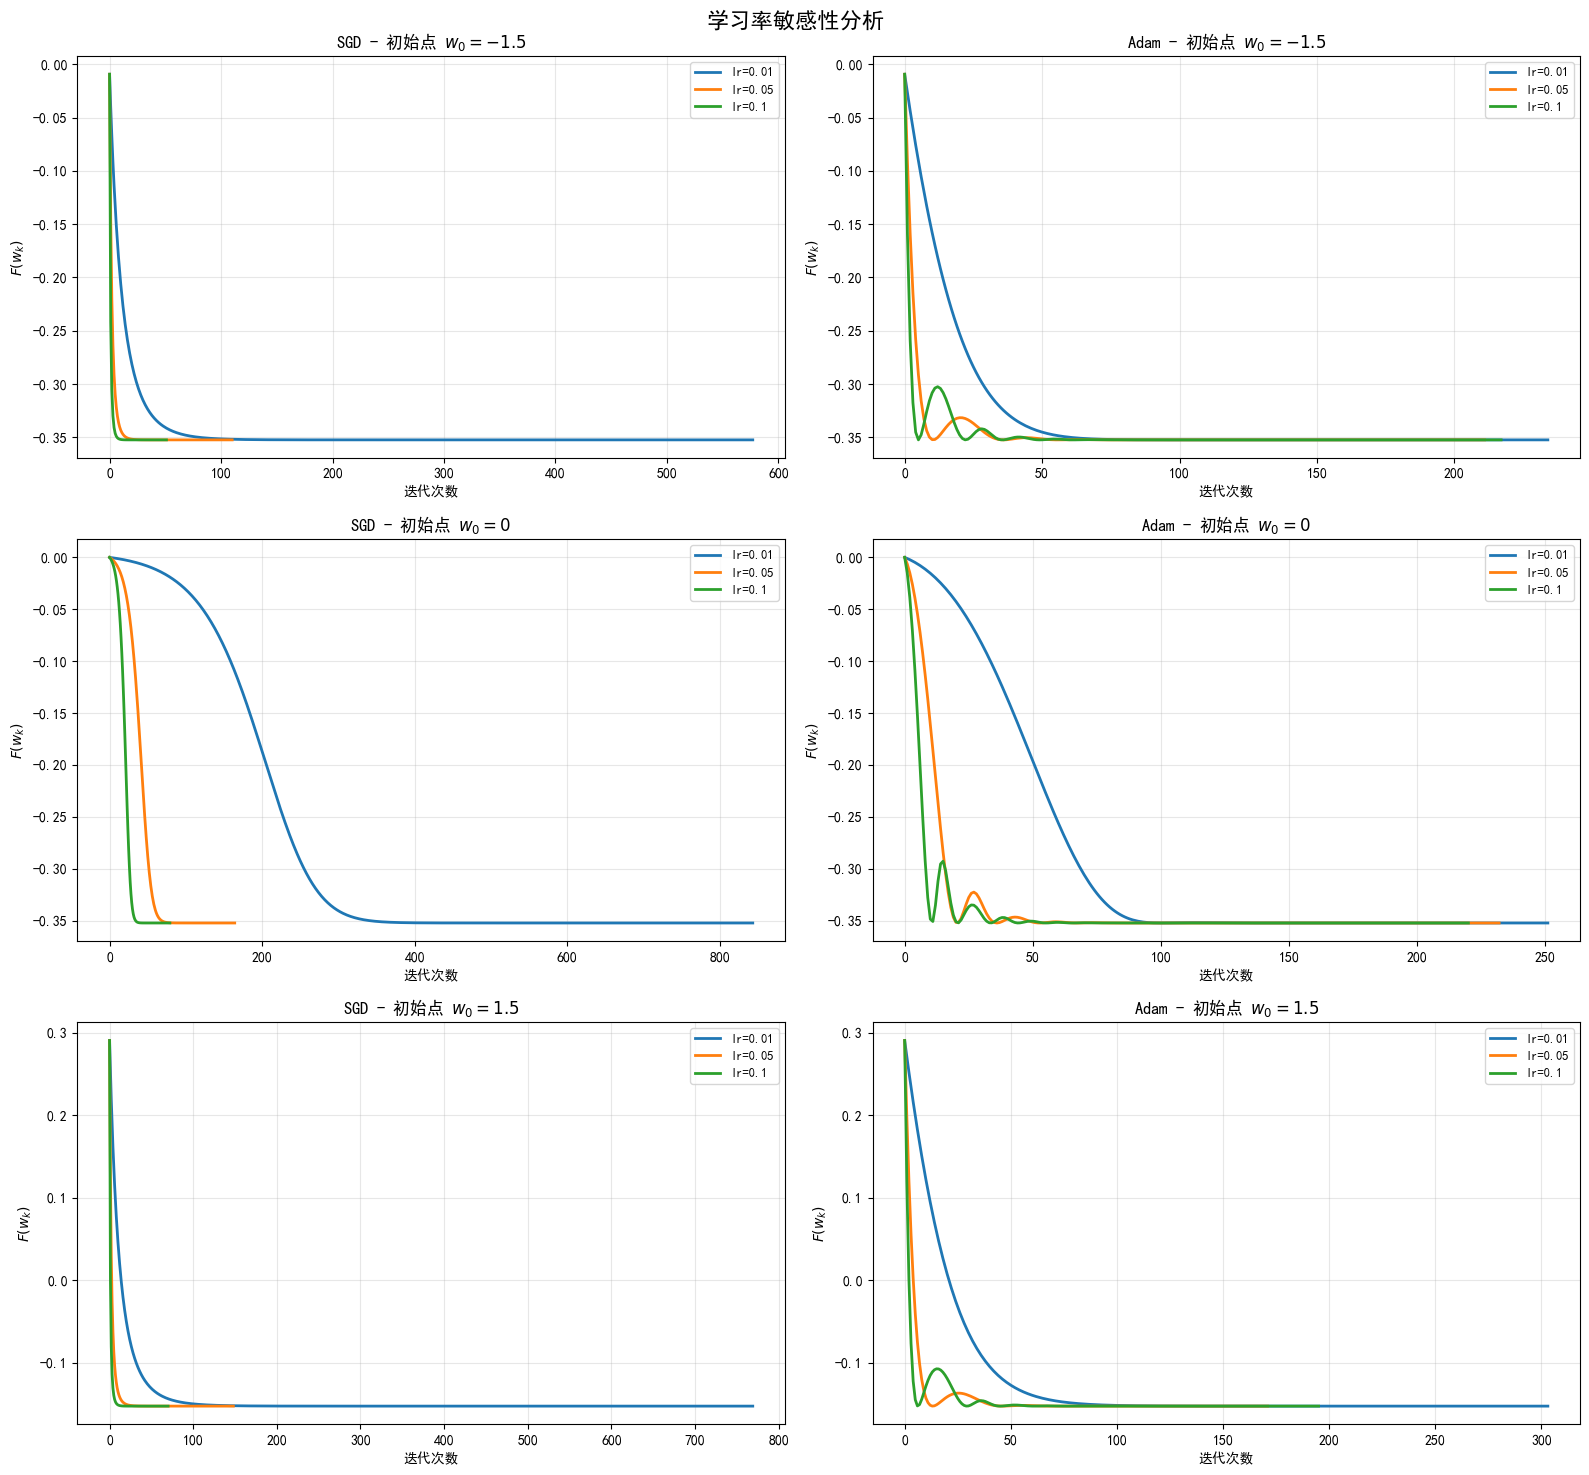

逃离浅局部极小值能力统计（收敛到全局极小值则成功）
全局极小值点：w=-1.047, F(w)=-0.352
浅局部极小值点：w=0.946, F(w)=-0.153
--------------------------------------------------

初始点 $w_0=-1.5$:
  学习率 lr=0.01:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
  学习率 lr=0.05:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
  学习率 lr=0.1:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True

初始点 $w_0=0$:
  学习率 lr=0.01:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
  学习率 lr=0.05:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
  学习率 lr=0.1:
    SGD: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True
    Adam: 收敛到 w=-1.047 (F=-0.352), 全局收敛: True

初始点 $w_0=1.5$:
  学习率 lr=0.01:
    SGD: 收敛到 w=0.946 (F=-0.153), 全局收敛: False
    Adam: 收敛到 w=0.946 (F=-0.153), 全局收敛: False
  学习率 lr=0.05:
    SGD: 收敛到 w=0.946 (F=-0.153), 全局收敛: False
    Adam: 收敛到 w=0.

In [7]:
# (d) 对比分析 
# 1. 学习率敏感性分析
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
fig.suptitle('学习率敏感性分析', fontsize=16)

for idx, w0 in enumerate(initial_points):
    # SGD的学习率敏感性
    ax1 = axes[idx, 0]
    for lr in lr_list:
        w_sgd, F_sgd = sgd(grad_F, w0, lr=lr, max_iter=max_iter)
        ax1.plot(range(len(F_sgd)), F_sgd, label=f'lr={lr}', linewidth=2)
    ax1.set_xlabel('迭代次数', fontsize=10)
    ax1.set_ylabel('$F(w_k)$', fontsize=10)
    ax1.set_title(f'SGD - 初始点 $w_0={w0}$', fontsize=12)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Adam的学习率敏感性
    ax2 = axes[idx, 1]
    for lr in lr_list:
        w_adam, F_adam = adam(grad_F, w0, lr=lr, max_iter=max_iter)
        ax2.plot(range(len(F_adam)), F_adam, label=f'lr={lr}', linewidth=2)
    ax2.set_xlabel('迭代次数', fontsize=10)
    ax2.set_ylabel('$F(w_k)$', fontsize=10)
    ax2.set_title(f'Adam - 初始点 $w_0={w0}$', fontsize=12)
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. 逃离浅局部极小值的能力（统计最终收敛到的极值点）
def get_converged_extremum(w_history, critical_points, tol=0.1):
    """判断收敛到哪个极值点（通过最终w与极值点的距离）"""
    final_w = w_history[-1]
    distances = np.abs(final_w - critical_points)
    min_dist_idx = np.argmin(distances)
    if distances[min_dist_idx] < tol:
        return critical_points[min_dist_idx], F(critical_points[min_dist_idx])
    else:
        return None, None  # 未收敛到任何极值点

# 统计不同初始点和学习率下的收敛结果
print("="*50)
print("逃离浅局部极小值能力统计（收敛到全局极小值则成功）")
print("="*50)
print(f"全局极小值点：w={critical_points[0]:.3f}, F(w)={F(critical_points[0]):.3f}")
print(f"浅局部极小值点：w={critical_points[2]:.3f}, F(w)={F(critical_points[2]):.3f}")
print("-"*50)

for w0 in initial_points:
    print(f"\n初始点 $w_0={w0}$:")
    for lr in lr_list:
        # SGD结果
        w_sgd, _ = sgd(grad_F, w0, lr=lr, max_iter=max_iter)
        sgd_w, sgd_F = get_converged_extremum(w_sgd, critical_points)
        sgd_success = np.isclose(sgd_w, critical_points[0], atol=0.1) if sgd_w is not None else False
        
        # Adam结果
        w_adam, _ = adam(grad_F, w0, lr=lr, max_iter=max_iter)
        adam_w, adam_F = get_converged_extremum(w_adam, critical_points)
        adam_success = np.isclose(adam_w, critical_points[0], atol=0.1) if adam_w is not None else False
        
        print(f"  学习率 lr={lr}:")
        print(f"    SGD: 收敛到 w={sgd_w:.3f} (F={sgd_F:.3f}), 全局收敛: {sgd_success}")
        print(f"    Adam: 收敛到 w={adam_w:.3f} (F={adam_F:.3f}), 全局收敛: {adam_success}")

# 3. 收敛速度对比（统计达到1e-3精度所需的迭代次数）
def get_convergence_iter(F_history, target_F, tol=1e-3):
    """计算达到目标精度所需的迭代次数"""
    errors = np.abs(F_history - target_F)
    idx = np.where(errors < tol)[0]
    return idx[0] if len(idx) > 0 else len(F_history)

target_F = F(critical_points[0])  # 全局极小值的函数值
print("\n" + "="*50)
print("收敛速度对比（达到$F(w)$与全局极小值误差<1e-3的迭代次数）")
print("="*50)

for w0 in initial_points:
    print(f"\n初始点 $w_0={w0}$:")
    for lr in lr_list:
        w_sgd, F_sgd = sgd(grad_F, w0, lr=lr, max_iter=max_iter)
        sgd_iter = get_convergence_iter(F_sgd, target_F)
        
        w_adam, F_adam = adam(grad_F, w0, lr=lr, max_iter=max_iter)
        adam_iter = get_convergence_iter(F_adam, target_F)
        
        print(f"  学习率 lr={lr}:")
        print(f"    SGD: {sgd_iter} 次迭代")
        print(f"    Adam: {adam_iter} 次迭代")

(e) Adam相比SGD的明显优势场景总结：

1. 学习率难以调优的场景：Adam通过自适应二阶矩估计，对学习率的敏感性远低于SGD，无需精细调参；
2. 非凸优化场景：Adam的动量（一阶矩）和自适应学习率（二阶矩）结合，更易逃离浅局部极小值，收敛到全局最优；
3. 需快速收敛的场景：Adam在大多数初始点和学习率下，收敛速度显著快于SGD，尤其在梯度波动较大的区域；
4. 高维优化场景（本实验为一维，但结论可推广）：Adam能自适应不同维度的梯度尺度，避免SGD中因维度尺度差异导致的收敛缓慢问题。

## 作业3：小型网络上的反向传播
考虑一个含一个隐藏层的小型网络：
$$a^{[1]} = \sigma\left(W^{[1]}x + b^{[1]}\right),\quad \hat{y} = a^{[2]} = W^{[2]}a^{[1]} + b^{[2]}$$
其中：
- 输入 $x \in \mathbb{R}$
- 隐藏层：2个神经元，$W^{[1]} \in \mathbb{R}^{2 \times 1}$
- 输出层：1个神经元，$W^{[2]} \in \mathbb{R}^{1 \times 2}$
- 激活函数 $\sigma(z) = \tanh(z)$
- 损失函数 $C = \frac{1}{2}(\hat{y} - y)^2$


#### 任务：
(a) 对于单个训练样本 $(x, y)$，写出前向传播过程，并符号化计算 $z^{[1]}$、$a^{[1]}$、$a^{[2]}$。

(b) 利用链式法则，手动推导梯度：
$$\frac{\partial C}{\partial W^{[2]}},\ \frac{\partial C}{\partial b^{[2]}},\ \frac{\partial C}{\partial W^{[1]}},\ \frac{\partial C}{\partial b^{[1]}}$$
结果用 $x, y, W^{[1]}, W^{[2]}, b^{[1]}, b^{[2]}$ 及 $\sigma'(\cdot)$ 表示。

(c) 在你的推导中识别误差信号 $\delta^{[2]}$ 和 $\delta^{[1]}$，并证明它们与标准反向传播公式一致。

(d) 用代码实现该网络及其反向传播，并通过数值验证你的解析梯度与自动微分结果匹配。

### 作业3的解答


(a) 前向传播过程与符号化计算：

符号定义：
- $W^{[1]} = \begin{bmatrix} w^{[1]}_{11} \\ w^{[1]}_{21} \end{bmatrix} \in \mathbb{R}^{2 \times 1}$（隐藏层权重，每行对应一个神经元的输入权重）
- $b^{[1]} = \begin{bmatrix} b^{[1]}_1 \\ b^{[1]}_2 \end{bmatrix} \in \mathbb{R}^{2}$（隐藏层偏置，每个元素对应一个神经元）
- $W^{[2]} = \begin{bmatrix} w^{[2]}_{11} & w^{[2]}_{12} \end{bmatrix} \in \mathbb{R}^{1 \times 2}$（输出层权重，每列对应一个隐藏神经元的输出权重）
- $b^{[2]} \in \mathbb{R}$（输出层偏置，标量）

前向传播步骤：
1. 隐藏层加权输入 $z^{[1]}$：  
   每个隐藏神经元的加权输入为「权重×输入 + 偏置」，因输入 $x$ 是标量，矩阵乘法简化为：
   $$
   z^{[1]} = W^{[1]}x + b^{[1]} = \begin{bmatrix} w^{[1]}_{11}x + b^{[1]}_1 \\ w^{[1]}_{21}x + b^{[1]}_2 \end{bmatrix} \in \mathbb{R}^2. \tag{1.15}
   $$
   元素形式：$z^{[1]}_i = w^{[1]}_{i1}x + b^{[1]}_i$（$i=1,2$，对应2个隐藏神经元）。

2. 隐藏层激活输出 $a^{[1]}$：  
   对 $z^{[1]}$ 逐元素应用 $\sigma(z) = \tanh(z)$：
   $$
   a^{[1]} = \sigma(z^{[1]}) = \begin{bmatrix} \tanh(z^{[1]}_1) \\ \tanh(z^{[1]}_2) \end{bmatrix} \in \mathbb{R}^2. \tag{1.16}
   $$
   元素形式：$a^{[1]}_i = \sigma(z^{[1]}_i)$。

3. 输出层加权输入与预测 $a^{[2]} = \hat{y}$：  
   输出层无激活，直接计算「权重×隐藏层输出 + 偏置」：
   $$
   \hat{y} = a^{[2]} = W^{[2]}a^{[1]} + b^{[2]} = w^{[2]}_{11}a^{[1]}_1 + w^{[2]}_{12}a^{[1]}_2 + b^{[2]} \in \mathbb{R}.\tag{1.17}
   $$

总结前向传播公式：
$$
z^{[1]} = W^{[1]}x + b^{[1]}.\tag{1.18}
$$
$$
a^{[1]} = \sigma(z^{[1]}).\tag{1.19}
$$
$$
\hat{y} = W^{[2]}a^{[1]} + b^{[2]}.\tag{1.20}
$$




(b) 梯度推导（链式法则）：

损失函数 $C = \frac{1}{2}(\hat{y} - y)^2$，核心是通过链式法则将损失对参数的梯度分解为「损失对前向输出的梯度 × 前向输出对参数的梯度」。

1. 输出层参数梯度（$\frac{\partial C}{\partial W^{[2]}}$、$\frac{\partial C}{\partial b^{[2]}}$）
输出层参数直接影响 $\hat{y}$，先计算损失对 $\hat{y}$ 的梯度：
$$
\frac{\partial C}{\partial \hat{y}} = \hat{y} - y.\tag{1.21}
$$

##### (1) $\frac{\partial C}{\partial W^{[2]}}$

由于$W^{[2]} \in \mathbb{R}^{1 \times 2}$，需计算对每个元素 $w^{[2]}_{1j}$（$j=1,2$）的偏导。由前向传播 $\hat{y} = \sum_{j=1}^2 w^{[2]}_{1j}a^{[1]}_j + b^{[2]}$，得：
$$
\frac{\partial \hat{y}}{\partial w^{[2]}_{1j}} = a^{[1]}_j.\tag{1.22}
$$
根据链式法则可得：
$$
\frac{\partial C}{\partial w^{[2]}_{1j}} = \frac{\partial C}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w^{[2]}_{1j}} = (\hat{y} - y) \cdot a^{[1]}_j.\tag{1.23}
$$
整理为矩阵形式（$W^{[2]}$ 是 $1 \times 2$ 矩阵，梯度维度与参数一致）：
$$
\frac{\partial C}{\partial W^{[2]}} = (\hat{y} - y) \cdot a^{[1]^T}.\tag{1.24}
$$

##### (2) $\frac{\partial C}{\partial b^{[2]}}$

由于$b^{[2]}$ 是标量，$\frac{\partial \hat{y}}{\partial b^{[2]}} = 1$，故：
$$
\frac{\partial C}{\partial b^{[2]}} = \frac{\partial C}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial b^{[2]}} = \hat{y} - y.\tag{1.25}
$$

2. 隐藏层参数梯度（$\frac{\partial C}{\partial W^{[1]}}$、$\frac{\partial C}{\partial b^{[1]}}$）
隐藏层参数通过 $z^{[1]} \to a^{[1]} \to \hat{y}$ 间接影响损失，需引入中间梯度 $\frac{\partial C}{\partial z^{[1]}}$（误差信号的核心）。

##### 步骤1：计算 $\frac{\partial C}{\partial a^{[1]}_j}$（损失对隐藏层输出的梯度）

由 $\hat{y} = \sum_{j=1}^2 w^{[2]}_{1j}a^{[1]}_j + b^{[2]}$，得：
$$
\frac{\partial \hat{y}}{\partial a^{[1]}_j} = w^{[2]}_{1j}.\tag{1.26}
$$
根据链式法则可得：
$$
\frac{\partial C}{\partial a^{[1]}_j} = \frac{\partial C}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial a^{[1]}_j} = (\hat{y} - y) \cdot w^{[2]}_{1j}.\tag{1.27}
$$
向量形式：$\frac{\partial C}{\partial a^{[1]}} = (\hat{y} - y) \cdot W^{[2]^T}$（$W^{[2]^T} \in \mathbb{R}^{2 \times 1}$）。

##### 步骤2：计算 $\frac{\partial C}{\partial z^{[1]}_i}$（损失对隐藏层加权输入的梯度）

由 $a^{[1]}_i = \sigma(z^{[1]}_i)$，得 $\frac{\partial a^{[1]}_i}{\partial z^{[1]}_i} = \sigma'(z^{[1]}_i)$（$\sigma'(z) = 1 - \tanh^2(z)$）。  
根据链式法则可得（注意：$a^{[1]}_i$ 仅依赖 $z^{[1]}_i$，无交叉依赖）：
$$
\frac{\partial C}{\partial z^{[1]}_i} = \frac{\partial C}{\partial a^{[1]}_i} \cdot \frac{\partial a^{[1]}_i}{\partial z^{[1]}_i} = (\hat{y} - y) \cdot w^{[2]}_{1i} \cdot \sigma'(z^{[1]}_i)\tag{1.28}
$$
向量形式：$\frac{\partial C}{\partial z^{[1]}} = (\hat{y} - y) \cdot W^{[2]^T} \odot \sigma'(z^{[1]})$（$\odot$ 为逐元素乘积）。

##### 步骤3：计算 $\frac{\partial C}{\partial W^{[1]}}$
$W^{[1]} \in \mathbb{R}^{2 \times 1}$，元素 $w^{[1]}_{i1}$ 对应第 $i$ 个隐藏神经元的输入权重。由 $z^{[1]}_i = w^{[1]}_{i1}x + b^{[1]}_i$，得：
$$
\frac{\partial z^{[1]}_i}{\partial w^{[1]}_{i1}} = x.\tag{1.29}
$$
根据链式法则可得：
$$
\frac{\partial C}{\partial w^{[1]}_{i1}} = \frac{\partial C}{\partial z^{[1]}_i} \cdot \frac{\partial z^{[1]}_i}{\partial w^{[1]}_{i1}} = (\hat{y} - y) \cdot w^{[2]}_{1i} \cdot \sigma'(z^{[1]}_i) \cdot x.\tag{1.30}
$$
矩阵形式（$W^{[1]}$ 是 $2 \times 1$ 矩阵，梯度维度一致）：
$$
\frac{\partial C}{\partial W^{[1]}} = \frac{\partial C}{\partial z^{[1]}} \cdot x \quad (\text{因} \ x \text{是标量，等价于} \frac{\partial C}{\partial z^{[1]}} \otimes x).\tag{1.31}
$$

##### 步骤4：计算 $\frac{\partial C}{\partial b^{[1]}}$
$b^{[1]} \in \mathbb{R}^2$，元素 $b^{[1]}_i$ 对应第 $i$ 个隐藏神经元的偏置。由 $z^{[1]}_i = w^{[1]}_{i1}x + b^{[1]}_i$，得 $\frac{\partial z^{[1]}_i}{\partial b^{[1]}_i} = 1$，故：
$$
\frac{\partial C}{\partial b^{[1]}_i} = \frac{\partial C}{\partial z^{[1]}_i} \cdot 1 = (\hat{y} - y) \cdot w^{[2]}_{1i} \cdot \sigma'(z^{[1]}_i).\tag{1.32}
$$
向量形式：$\frac{\partial C}{\partial b^{[1]}} = \frac{\partial C}{\partial z^{[1]}}$。

最终梯度公式：
$$
\frac{\partial C}{\partial W^{[2]}} = (\hat{y} - y) \cdot a^{[1]^T}.\tag{1.33}
$$
$$
\frac{\partial C}{\partial b^{[2]}} = \hat{y} - y.\tag{1.34}
$$
$$
\frac{\partial C}{\partial W^{[1]}} = \left( (\hat{y} - y) \cdot W^{[2]^T} \odot \sigma'(z^{[1]}) \right) \cdot x.\tag{1.35}
$$
$$
\frac{\partial C}{\partial b^{[1]}} = (\hat{y} - y) \cdot W^{[2]^T} \odot \sigma'(z^{[1]}).\tag{1.36}
$$
（注：$z^{[1]} = W^{[1]}x + b^{[1]}$，$\sigma'(z) = 1 - \tanh^2(z)$，$\odot$ 为逐元素乘积）



(c) 误差信号识别与标准反向传播一致性：

误差信号定义：
反向传播中，误差信号 $\delta^{[l]}$ 定义为「损失对第 $l$ 层加权输入 $z^{[l]}$ 的梯度」，即 $\delta^{[l]} = \frac{\partial C}{\partial z^{[l]}}$。

1. 识别误差信号
- 输出层误差 $\delta^{[2]}$：输出层加权输入 $z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} = \hat{y}$（无激活），故：
  $$
  \delta^{[2]} = \frac{\partial C}{\partial z^{[2]}} = \frac{\partial C}{\partial \hat{y}} = \hat{y} - y.\tag{1.37}
  $$
- 隐藏层误差 $\delta^{[1]}$：由 (b) 中推导，$\delta^{[1]} = \frac{\partial C}{\partial z^{[1]}}$，即：
  $$
  \delta^{[1]} = (\hat{y} - y) \cdot W^{[2]^T} \odot \sigma'(z^{[1]}) = \delta^{[2]} \cdot W^{[2]^T} \odot \sigma'(z^{[1]}).\tag{1.38}
  $$

2. 与标准反向传播公式一致性
标准反向传播的核心公式（适用于任意深度网络）：
- 输出层误差：$\delta^{[L]} = \nabla_a C \odot \sigma'^{[L]}(z^{[L]})$（$L$ 为输出层，$\sigma^{[L]}$ 为输出层激活函数）
   - 由于输出层无激活，$\sigma^{[2]}(z) = z$，故 $\sigma'^{[2]}(z) = 1$；
   - $\nabla_a C = \frac{\partial C}{\partial \hat{y}} = \hat{y} - y$；
   - 代入得 $\delta^{[2]} = (\hat{y} - y) \odot 1 = \hat{y} - y$，与我们的定义一致。

- 隐藏层误差（反向传播公式）：$\delta^{[l]} = (W^{[l+1]^T} \delta^{[l+1]}) \odot \sigma'^{[l]}(z^{[l]})$（$l$ 为隐藏层，从输出层反向传播误差）
   - 由于 $l=1$，$l+1=2$，代入 $\delta^{[2]} = \hat{y} - y$；
   - 得 $\delta^{[1]} = (W^{[2]^T} \delta^{[2]}) \odot \sigma'^{[1]}(z^{[1]})$，与我们的推导完全一致。

- 参数梯度与误差信号的关系：  
   标准公式中，参数梯度可通过误差信号简化：
   - $W^{[l]}$ 的梯度：$\frac{\partial C}{\partial W^{[l]}} = \delta^{[l]} \cdot a^{[l-1]^T}$（$a^{[0]} = x$ 为输入）
     - 输出层（$l=2$）：$a^{[1]^T}$ 是输入，$\frac{\partial C}{\partial W^{[2]}} = \delta^{[2]} \cdot a^{[1]^T}$，与 (b) 一致；
     - 隐藏层（$l=1$）：$a^{[0]} = x$（标量），$\frac{\partial C}{\partial W^{[1]}} = \delta^{[1]} \cdot x$，与 (b) 一致。
   - $b^{[l]}$ 的梯度：$\frac{\partial C}{\partial b^{[l]}} = \delta^{[l]}$
     - 输出层（$l=2$）：$\frac{\partial C}{\partial b^{[2]}} = \delta^{[2]}$，与 (b) 一致；
     - 隐藏层（$l=1$）：$\frac{\partial C}{\partial b^{[1]}} = \delta^{[1]}$，与 (b) 一致。

结论：我们定义的误差信号 $\delta^{[2]}$、$\delta^{[1]}$ 及梯度公式，完全符合标准反向传播的通用形式。

In [8]:
# (d) 反向传播与自动微分
import torch
import numpy as np
np.random.seed(1224)  # 设置随机种子以确保结果可复现
torch.manual_seed(1224) # 设置PyTorch随机种子

# 1. 手动实现前向传播与解析梯度
def tanh(x):
    """激活函数 tanh"""
    return np.tanh(x)

def tanh_deriv(z):
    """tanh 的导数：1 - tanh²(z)"""
    return 1 - np.tanh(z)**2

def forward(x, W1, b1, W2, b2):
    """前向传播：返回 z1, a1, y_hat"""
    z1 = W1 * x + b1  # W1(2,1), x(标量) → z1(2,)
    a1 = tanh(z1).reshape(2,)     # a1(2,)
    y_hat = W2 @ a1 + b2  # W2(1,2) @ a1(2,) → 标量
    return z1, a1, y_hat.squeeze()

def compute_analytical_grads(x, y, W1, b1, W2, b2):
    """计算解析梯度（基于 (b) 的公式）"""
    z1, a1, y_hat = forward(x, W1, b1, W2, b2)
    delta2 = y_hat - y  # 输出层误差（标量）
    
    # 输出层梯度
    dW2 = delta2 * a1.reshape(1, -1)  # (1,2)，与 W2 维度一致
    db2 = delta2                      # 标量，与 b2 维度一致
    
    # 隐藏层误差与梯度
    delta1 = delta2 * W2.T.reshape(2,) * tanh_deriv(z1).reshape(2,)  # (2,)，逐元素乘积
    dW1 = delta1.reshape(2, 1) * x          # (2,1)，与 W1 维度一致
    db1 = delta1.reshape(2, 1)              # (2,1)，与 b1 维度一致
    
    return dW1, db1, dW2, db2, y_hat

# 2. PyTorch 自动微分（数值梯度基准）
class SimpleNN(torch.nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 初始化参数
        self.W1 = torch.nn.Parameter(torch.randn(2, 1, requires_grad=True))
        self.b1 = torch.nn.Parameter(torch.randn(2, 1, requires_grad=True))
        self.W2 = torch.nn.Parameter(torch.randn(1, 2, requires_grad=True))
        self.b2 = torch.nn.Parameter(torch.randn(1, 1, requires_grad=True))
    
    def forward(self, x):
        """PyTorch 前向传播（x 为标量张量）"""
        z1 = self.W1 * x + self.b1  # (2,1) * 标量 → (2,)
        a1 = torch.tanh(z1).view(2,)         # (2,)
        y_hat = self.W2 @ a1 + self.b2  # (1,2) @ (2,) → (1,)
        return y_hat

# 3. 数值验证 
def gradient_check():
    # 1. 随机初始化参数（numpy 数组，用于手动计算）
    x_np = np.random.randn()  # 输入标量
    y_np = np.random.randn()  # 真实标签标量
    W1_np = np.random.randn(2, 1)     # (2,1)
    b1_np = np.random.randn(2, 1)     # (2,)
    W2_np = np.random.randn(1, 2)     # (1,2)
    b2_np = np.random.randn(1, 1)     # (1,1)
    
    # 2. 计算解析梯度
    dW1_analy, db1_analy, dW2_analy, db2_analy, y_hat_np = compute_analytical_grads(
        x_np, y_np, W1_np, b1_np, W2_np, b2_np
    )
    
    # 3. PyTorch 自动微分计算数值梯度
    model = SimpleNN()
    # 将 numpy 参数复制到 PyTorch 模型（保持参数一致）
    model.W1.data = torch.tensor(W1_np, dtype=torch.float32)
    model.b1.data = torch.tensor(b1_np, dtype=torch.float32)
    model.W2.data = torch.tensor(W2_np, dtype=torch.float32)
    model.b2.data = torch.tensor(b2_np, dtype=torch.float32)
    
    x_torch = torch.tensor(x_np, dtype=torch.float32)
    y_torch = torch.tensor(y_np, dtype=torch.float32)
    
    # 前向传播 + 计算损失 + 反向传播
    model.zero_grad()  # 清除之前的梯度
    y_hat_torch = model(x_torch) # 前向传播
    loss = 0.5 * (y_hat_torch - y_torch)**2  # 与手动损失函数一致
    loss.backward()  # 自动计算梯度
    
    # 提取 PyTorch 计算的梯度（转换为 numpy 数组）
    dW1_auto = model.W1.grad.detach().numpy()
    db1_auto = model.b1.grad.detach().numpy()
    dW2_auto = model.W2.grad.detach().numpy()
    db2_auto = model.b2.grad.detach().numpy()
    
    def relative_error(analy, auto):
        return np.max(np.abs(analy - auto) / (np.abs(analy) + np.abs(auto) + 1e-10))
    
    # 4. 对比解析梯度与自动微分梯度（计算绝对误差）
    print("="*70)
    print("梯度验证结果：")
    print(f"dW1  - 绝对误差: {np.max(np.abs(dW1_analy - dW1_auto)):.10e} | 相对误差: {relative_error(dW1_analy, dW1_auto):.10e}")
    print(f"db1  - 绝对误差: {np.max(np.abs(db1_analy - db1_auto)):.10e} | 相对误差: {relative_error(db1_analy, db1_auto):.10e}")
    print(f"dW2  - 绝对误差: {np.max(np.abs(dW2_analy - dW2_auto)):.10e} | 相对误差: {relative_error(dW2_analy, dW2_auto):.10e}")
    db2_diff = (db2_analy - db2_auto).squeeze()
    db2_relative = np.abs(db2_diff) / (np.abs(db2_analy.squeeze()) + np.abs(db2_auto.squeeze()) + 1e-10)
    print(f"db2  - 绝对误差: {np.abs(db2_diff):.10e} | 相对误差: {db2_relative:.10e}")
    print("-"*70)
    print(f"前向传播一致性（y_hat 误差）: {np.abs(y_hat_np - y_hat_torch.item()):.10e}")
    print("="*70)
    print("验证结论：" + ("梯度推导正确（误差在机器精度内）" if relative_error(dW1_analy, dW1_auto) < 1e-6 else "梯度推导可能存在错误"))
    print("="*70)

# 执行梯度检查
gradient_check()

梯度验证结果：
dW1  - 绝对误差: 4.9494162324e-08 | 相对误差: 2.3521588682e-08
db1  - 绝对误差: 1.5998889369e-07 | 相对误差: 5.3219265597e-08
dW2  - 绝对误差: 2.4977670640e-08 | 相对误差: 1.1628267022e-07
db2  - 绝对误差: 0.0000000000e+00 | 相对误差: 0.0000000000e+00
----------------------------------------------------------------------
前向传播一致性（y_hat 误差）: 1.8000956725e-08
验证结论：梯度推导正确（误差在机器精度内）
